<a href="https://colab.research.google.com/github/kkamal11/MLT/blob/main/LR_with_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import matplotlib.pyplot as plt


## Dataset

Run the cell given below to generate the data-matrix $X$ and target vector $y$. $X$ is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. $y$ is of shape $(n,)$. You will be using this dataset for the rest of the session. 



In [48]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y = True)

# set the random seed value to 0
np.random.seed(0)

In [49]:
X.shape

(442, 10)


Write a function `shuffle_data(X, y)` that returns the shuffled $X$ and $y$. 

Note that it should shuffle the data pairs $(x_i, y_i)$. 



In [50]:
## Shuffle data
def shuffle_data(X, y):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    return X[indices], y[indices]

In [51]:
X, y = shuffle_data(X, y)


Write a function `train_test_split(X, y, test_size)` that divides the data (X, y) into $X_{train}$, $X_{test}$, $y_{train}$, $y_{test}$ respectively as per test_size which should be a value between 0 and 1.

That is, if test_size = $t$, then `int(t*n)` data points should go to test and the remaining data points should go to train.

$X_{train}$, $X_{test}$, $y_{train}$, $y_{test}$ should be returned by the function.








In [52]:
## Train Test split
def train_test_split(X, y, test_size):
    X, y = shuffle_data(X, y)
    num_of_train_points = len(y) - int(len(y) * test_size)
    X_train, X_test = X[:num_of_train_points], X[num_of_train_points:]
    y_train, y_test = y[:num_of_train_points], y[num_of_train_points:]
    return X_train, X_test, y_train, y_test

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 0.25)
print(np.sum(y_test))

16433.0


In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((332, 10), (110, 10), (332,), (110,))


Add a dummy feature, i.e., a column containing all 1's (as the first column) in $X_{train}$ and $X_{test}$.

Take the transpose of both $X_{train}$ and $X_{test}$.



In [55]:
### Add dummy feature
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train)).T
X_test = np.column_stack((np.ones(X_test.shape[0]), X_test)).T

In [56]:
X_train.shape, X_test.shape

((11, 332), (11, 110))



Write a function `compute_weights(X, y)` that uses the closed form formula of linear regression and returns a weight vector.



In [57]:
## Weight vector
def compute_weights(X, y):
    w = np.linalg.pinv(X @ X.T) @ X @ y
    return w

In [58]:
w = compute_weights(X_train, y_train)
w_p_sum = np.sum(w)
print(w_p_sum)
np.round(w,1)

1454.1221941768836


array([ 152.9,  -73.9, -261.3,  501.2,  288.6, -654.3,  443.2,   88.4,
        242.4,  664.4,   62.6])



Write a function `MSE(X, y, w)` that returns the mean squared error for the given `X`, `y` as per `w` values.



In [59]:
## MSE
def MSE(X, y, w):
    y_pred = X.T @ w
    return np.mean((y - y_pred) ** 2)

In [60]:
train_error = MSE(X_train, y_train, w)
test_error = MSE(X_test, y_test, w)
train_error, test_error

(2771.093164840927, 3296.443580041717)


Write a function `compute_weights_ridge(X, y)` that uses the closed form formula of Ridge regression and returns a weight vector.



In [61]:
#### Ridge weight vector
def compute_weights_ridge(X, y, lambdaa):
    w = np.linalg.pinv(X @ X.T + lambdaa * np.eye(X.shape[0])) @ X @ y
    return w

In [64]:
w = compute_weights_ridge(X_train, y_train, 0.3)
print(w)
w_ridge_sum = np.sum(w)
print(w_ridge_sum)

[ 152.84362271  -34.46555309 -157.30342921  378.04139768  231.93871602
   15.57485021  -21.05431327 -165.58296708  146.10348544  313.20841088
  105.37970096]
964.6839212414957


In [65]:
print(w_p_sum - w_ridge_sum)

489.4382729353879




Compute the train error and test error.

In [66]:
### Test and train error
train_error = MSE(X_train, y_train, w)
test_error = MSE(X_test, y_test, w)
print(np.abs(train_error - test_error))

754.0074653775923


Use 10 different values between 0 and 5 as the regularization strength and keep a record of the weight vectors obtained for each. Further, calculate the sum of weights for each weight vector. Plot these sums of weights (on y-axis) with respect to the regularization strength (on x-axis) and observe the reduction in (sum of) weights.

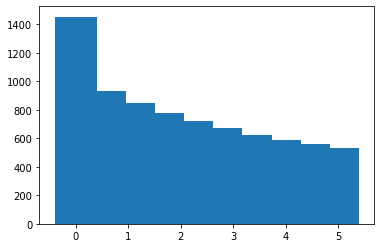

In [72]:
x = np.linspace(0, 5, 10)
W_sum = []
for i in range(len(x)):
    w = compute_weights_ridge(X_train, y_train, x[i])
    W_sum.append(np.sum(w))

plt.bar(x, W_sum);